In [7]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [8]:
images_dir = 'h-and-m-personalized-fashion-recommendations/images'

In [9]:
def getImagePaths(path):
    """
    Function to Combine Directory Path with individual Image Paths
    
    parameters: path(string) - Path of directory
    returns: image_names(string) - Full Image Path
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image

def load_data():
    output=[]
    output=getImagePaths(images_dir)[:10000]
    return output

In [23]:
def model():
    model=Xception(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

In [21]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_se

 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
          

                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_s

                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)                         64)                                                               
                                                                                                  
 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
          

 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
                                                                                                  
 block4_pool (MaxPooling2D)     (None, None, None,   0           ['block4_sepconv2_bn[0][0]']     
                                728)                                                              
                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalizat

                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_se

 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
          

 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_se

                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
          

 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)       

                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_s

 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
          

 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
          

                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_se

 2D)                            728)                                                              
                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
          

 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization

                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
                                1024)                             'batch_normalization_11[0][0]'] 
                                                                                                  
 block14_s

 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)                             256)                                                              
          

 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block6_sepconv1 (SeparableConv  (None, None, None,   536536     ['block6_sepconv1_act[0][0]']    
 2D)      

                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_30 (A

 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)                            728)                                                              
          

 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
                                                                                                  
 block14_sepconv2_bn (BatchNorm  (None, None, None,   8192       ['block14_sepconv2[0][0]']       
 alization

                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
                                                                                                  
 batch_nor

 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
          

 block9_sepconv1_act (Activatio  (None, None, None,   0          ['add_30[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_s

 on)                            2048)                                                             
                                                                                                  
Total params: 20,861,480
Trainable params: 20,787,464
Non-trainable params: 74,016
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
        

 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)

                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_se

 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
          

 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization

                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_co

 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
          

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
                                                                                                  
 batch_normalization_9 (BatchNo  (None, None, None,   1024       ['conv2d_9[0][0]']               
 rmalization)                   256)                                                              
                                                                                                  
 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_se

 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv3_act (Activatio  (None, None, None,   0          ['block6_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv2 (SeparableConv  (None, None, None,   536536     ['block9_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)

                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_s

 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_co

 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_se

 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
          

 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)     

                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)                         64)                                                               
                                                                                                  
 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
                                                                                                  
 block2_se

 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
                                                                                                  
 block4_pool (MaxPooling2D)     (None, None, None,   0           ['block4_sepconv2_bn[0][0]']     
                                728)                                                              
                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
          

 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)       

                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_s

 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)

                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_se

 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
          

 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization

                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11

                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
          

 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv3 (SeparableConv  (None, None, None,   536536     ['block5_sepconv3_act[0][0]']    
 2D)      

                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_se

                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization)                     728)                                                              
          

 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
                                1024)                             'batch_normalization_11[0][0]'] 
                                                                                                  
 block14_sepconv1 (SeparableCon  (None, None, None,   1582080    ['add_35[0][0]']                 
 v2D)     

                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)                             256)                                                              
                                                                                                  
 block3_se

 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block6_sepconv1 (SeparableConv  (None, None, None,   536536     ['block6_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_30 (Add)                   (None, None, None,   0           ['block8_sepconv3_bn[0][0]',     
          

                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_s

 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
                                                                                                  
 block14_sepconv2_bn (BatchNorm  (None, None, None,   8192       ['block14_sepconv2[0][0]']       
 alization)                     2048)                                                             
          

 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
                                                                                                  
 batch_normalization_9 (BatchNo  (None, None, None,   1024       ['conv2d_9[0][0]']               
 rmalizati

                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_se

 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)                             728)                                                              
          

 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
Total params: 20,861,480
Trainable params: 20,717,768
Non-trainable params: 143,712
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
       

                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
          

 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)       

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_s

 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
          

 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)

                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_se

 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
          

 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization

                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (A

 n)                             728)                                                              
                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
          

 block8_sepconv1 (SeparableConv  (None, None, None,   536536     ['block8_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_s

                                1024)                                                             
                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
                                1024)                             'batch_normalization_11[0][0]'] 
          

 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block6_se

 lization)                      728)                                                              
                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)                      728)                                                              
          

 block11_sepconv2_act (Activati  (None, None, None,   0          ['block11_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)      

                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
                                                                                                  
 block14_s

 2D)                            256)                                                              
                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
          

 block6_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)

                                                                                                  
 block9_sepconv1_act (Activatio  (None, None, None,   0          ['add_30[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_se

 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
          

 block14_sepconv2_act (Activati  (None, None, None,   0          ['block14_sepconv2_bn[0][0]']    
 on)                            2048)                                                             
                                                                                                  
Total params: 20,861,480
Trainable params: 19,889,472
Non-trainable params: 972,008
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1

                                                                                                  
 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_se

 n)                             728)                                                              
                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
          

 block9_sepconv2 (SeparableConv  (None, None, None,   536536     ['block9_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)      

                                                                                                  
 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_s

                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
          

 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
          

                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_se

 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
          

                                                                                                  
 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
                                                                                                  
 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_se

                                728)                                                              
                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
          

 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)

                                                                                                  
 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_s

 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
          

 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
          

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)

                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_se

 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
          

 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization

                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11

                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
          

 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv3 (SeparableConv  (None, None, None,   536536     ['block5_sepconv3_act[0][0]']    
 2D)      

                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_se

                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization)                     728)                                                              
          

 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
                                1024)                             'batch_normalization_11[0][0]'] 
                                                                                                  
 block14_sepconv1 (SeparableCon  (None, None, None,   1582080    ['add_35[0][0]']                 
 v2D)     

                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)                             256)                                                              
                                                                                                  
 block3_se

 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block6_sepconv1 (SeparableConv  (None, None, None,   536536     ['block6_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_30 (Add)                   (None, None, None,   0           ['block8_sepconv3_bn[0][0]',     
          

                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_s

 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
                                                                                                  
 block14_sepconv2_bn (BatchNorm  (None, None, None,   8192       ['block14_sepconv2[0][0]']       
 alization)                     2048)                                                             
          

 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
                                                                                                  
 batch_normalization_9 (BatchNo  (None, None, None,   1024       ['conv2d_9[0][0]']               
 rmalizati

                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_se

 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)                             728)                                                              
          

 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
Total params: 20,861,480
Trainable params: 18,086,216
Non-trainable params: 2,775,264
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
     

                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
          

 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)       

                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_se

 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
          

 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)   

                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
                                                                                                  
 block4_po

 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)                            728)                                                              
          

 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization

                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_s

                                64)                                                               
                                                                                                  
 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
          

 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)      

                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (A

 on)                            728)                                                              
                                                                                                  
 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
          

 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)     

                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_nor

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
          

 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
          

                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_se

 2D)                            728)                                                              
                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
          

 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization

                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
                                1024)                             'batch_normalization_11[0][0]'] 
                                                                                                  
 block14_s

 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)                             256)                                                              
          

 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block6_sepconv1 (SeparableConv  (None, None, None,   536536     ['block6_sepconv1_act[0][0]']    
 2D)      

                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_30 (A

 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)                            728)                                                              
          

 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
                                                                                                  
 block14_sepconv2_bn (BatchNorm  (None, None, None,   8192       ['block14_sepconv2[0][0]']       
 alization

                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
                                256)                                                              
                                                                                                  
 batch_nor

 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
          

 block9_sepconv1_act (Activatio  (None, None, None,   0          ['add_30[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_s

 on)                            2048)                                                             
                                                                                                  
Total params: 20,861,480
Trainable params: 15,396,256
Non-trainable params: 5,465,224
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
     

 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)

                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_se

 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
          

 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization

                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_co

 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
          

 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_s

 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
          

 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
                                                                                                  
 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_se

 lization)                      728)                                                              
                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
          

 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)      

                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_s

 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
          

 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv2_act (Activatio  (None, None, None,   0          ['block5_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)

                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block8_sepconv1 (SeparableConv  (None, None, None,   536536     ['block8_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_se

 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
          

 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
                                1024)                                                             
                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
                                                                                                  
 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_se

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv2_act (Activati  (None, None, None,   0          ['block11_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_s

                                1024)                             'batch_normalization_11[0][0]'] 
                                                                                                  
 block14_sepconv1 (SeparableCon  (None, None, None,   1582080    ['add_35[0][0]']                 
 v2D)                           1536)                                                             
                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
          

 block3_sepconv2_act (Activatio  (None, None, None,   0          ['block3_sepconv1_bn[0][0]']     
 n)                             256)                                                              
                                                                                                  
 block3_sepconv2 (SeparableConv  (None, None, None,   67840      ['block3_sepconv2_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
          

                                                                                                  
 block6_sepconv1 (SeparableConv  (None, None, None,   536536     ['block6_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_se

 lization)                      728)                                                              
                                                                                                  
 add_30 (Add)                   (None, None, None,   0           ['block8_sepconv3_bn[0][0]',     
                                728)                              'add_29[0][0]']                 
                                                                                                  
 block9_sepconv1_act (Activatio  (None, None, None,   0          ['add_30[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block11_sepconv3_act (Activati  (None, None, None,   0          ['block11_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_sepconv3 (SeparableCon  (None, None, None,   536536     ['block11_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
          

                                                                                                  
 block14_sepconv2_bn (BatchNorm  (None, None, None,   8192       ['block14_sepconv2[0][0]']       
 alization)                     2048)                                                             
                                                                                                  
 block14_sepconv2_act (Activati  (None, None, None,   0          ['block14_sepconv2_bn[0][0]']    
 on)                            2048)                                                             
                                                                                                  
Total params: 20,861,480
Trainable params: 13,244,288
Non-trainable params: 7,617,192
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Laye

                                256)                                                              
                                                                                                  
 batch_normalization_9 (BatchNo  (None, None, None,   1024       ['conv2d_9[0][0]']               
 rmalization)                   256)                                                              
                                                                                                  
 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
          

 block6_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv3_act (Activatio  (None, None, None,   0          ['block6_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)

                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv2 (SeparableConv  (None, None, None,   536536     ['block9_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_se

 on)                            728)                                                              
                                                                                                  
 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
          

 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
          

                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_se

                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
          

 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)      

                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_s

                                64)                                                               
                                                                                                  
 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)                         64)                                                               
                                                                                                  
 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
                                                                                                  
 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
          

 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
                                                                                                  
 block4_pool (MaxPooling2D)     (None, None, None,   0           ['block4_sepconv2_bn[0][0]']     
                                728)                                                              
                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
          

                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_se

 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
          

 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization

                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 conv2d_8 

 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv2_act (Activatio  (None, None, None,   0          ['block5_sepconv1_bn[0][0]']     
 n)                             728)                                                              
          

 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block8_sepconv1 (SeparableConv  (None, None, None,   536536     ['block8_sepconv1_act[0][0]']    
 2D)      

                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_32 (A

 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
                                1024)                                                             
          

 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
                                                                                                  
 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)       

                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_s

 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
          

 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv2_act (Activatio  (None, None, None,   0          ['block5_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block8_se

 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization)                     728)                                                              
          

 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
          

                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
                                                                                                  
 block3_se

 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv3 (SeparableConv  (None, None, None,   536536     ['block5_sepconv3_act[0][0]']    
 2D)                            728)                                                              
          

 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv2[0][0]']        
 lization)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
          

 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)

                                                                                                  
 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
                                1024)                                                             
                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (A

                                128)                              'batch_normalization_8[0][0]']  
                                                                                                  
 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
          

 block5_sepconv3 (SeparableConv  (None, None, None,   536536     ['block5_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)       

                                                                                                  
 block8_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_se

 alization)                     728)                                                              
                                                                                                  
 block11_sepconv2_act (Activati  (None, None, None,   0          ['block11_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
          

 block14_sepconv1 (SeparableCon  (None, None, None,   1582080    ['add_35[0][0]']                 
 v2D)                           1536)                                                             
                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block3_sepconv2 (SeparableConv  (None, None, None,   67840      ['block3_sepconv2_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_po

 2D)                            728)                                                              
                                                                                                  
 block6_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
          

 add_30 (Add)                   (None, None, None,   0           ['block8_sepconv3_bn[0][0]',     
                                728)                              'add_29[0][0]']                 
                                                                                                  
 block9_sepconv1_act (Activatio  (None, None, None,   0          ['add_30[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)

                                                                                                  
 block11_sepconv3 (SeparableCon  (None, None, None,   536536     ['block11_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_s

 alization)                     2048)                                                             
                                                                                                  
 block14_sepconv2_act (Activati  (None, None, None,   0          ['block14_sepconv2_bn[0][0]']    
 on)                            2048)                                                             
                                                                                                  
Total params: 20,861,480
Trainable params: 9,478,344
Non-trainable params: 11,383,136
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
     

 batch_normalization_9 (BatchNo  (None, None, None,   1024       ['conv2d_9[0][0]']               
 rmalization)                   256)                                                              
                                                                                                  
 add_25 (Add)                   (None, None, None,   0           ['block3_pool[0][0]',            
                                256)                              'batch_normalization_9[0][0]']  
                                                                                                  
 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)      

                                                                                                  
 block6_sepconv3_act (Activatio  (None, None, None,   0          ['block6_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv3 (SeparableConv  (None, None, None,   536536     ['block6_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (A

 n)                             728)                                                              
                                                                                                  
 block9_sepconv2 (SeparableConv  (None, None, None,   536536     ['block9_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
          

 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)     

                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_co

 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
          

 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_s

 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
          

 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)                         64)                                                               
                                                                                                  
 block1_conv2_act (Activation)  (None, None, None,   0           ['block1_conv2_bn[0][0]']        
                                64)                                                               
                                                                                                  
 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)

                                                                                                  
 block4_pool (MaxPooling2D)     (None, None, None,   0           ['block4_sepconv2_bn[0][0]']     
                                728)                                                              
                                                                                                  
 batch_normalization_10 (BatchN  (None, None, None,   2912       ['conv2d_10[0][0]']              
 ormalization)                  728)                                                              
                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_se

 2D)                            728)                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv3_act (Activatio  (None, None, None,   0          ['block7_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
          

 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv2_act (Activati  (None, None, None,   0          ['block10_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization

                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block13_sepconv1 (SeparableCon  (None, None, None,   536536     ['block13_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_s

 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv2_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv2[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
          

 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv2_act (Activatio  (None, None, None,   0          ['block5_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
                                                                                                  
 block8_sepconv1_act (Activatio  (None, None, None,   0          ['add_29[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block8_sepconv1 (SeparableConv  (None, None, None,   536536     ['block8_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_se

 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
          

 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_sepconv2_bn (BatchNorm  (None, None, None,   4096       ['block13_sepconv2[0][0]']       
 alization)                     1024)                                                             
                                                                                                  
 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
                                1024)                                                             
                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
          

                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
                                                                                                  
 add_24 (Add)                   (None, None, None,   0           ['block2_pool[0][0]',            
                                128)                              'batch_normalization_8[0][0]']  
                                                                                                  
 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)                             128)                                                              
                                                                                                  
 block3_se

 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv3 (SeparableConv  (None, None, None,   536536     ['block5_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
          

 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, None, None,   536536     ['block8_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)       

                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_sepconv2_act (Activati  (None, None, None,   0          ['block11_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 block9_sepconv1 (SeparableConv  (None, None, None,   536536     ['block9_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block9_sepconv2_act (Activatio  (None, None, None,   0          ['block9_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv2 (SeparableConv  (None, None, None,   536536     ['block9_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_33 (Add)                   (None, None, None,   0           ['block11_sepconv3_bn[0][0]',    
                                728)                              'add_32[0][0]']                 
                                                                                                  
 block12_sepconv1_act (Activati  (None, None, None,   0          ['add_33[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block12_sepconv1 (SeparableCon  (None, None, None,   536536     ['block12_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_s

Total params: 20,861,480
Trainable params: 7,326,376
Non-trainable params: 13,535,104
__________________________________________________________________________________________________
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 bloc

 block4_sepconv1_act (Activatio  (None, None, None,   0          ['add_25[0][0]']                 
 n)                             256)                                                              
                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)       

                                                                                                  
 block6_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_se

 lization)                      728)                                                              
                                                                                                  
 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
          

 block12_sepconv2_act (Activati  (None, None, None,   0          ['block12_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)      

                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
                                                                                                  
 block1_conv2_bn (BatchNormaliz  (None, None, None,   256        ['block1_conv2[0][0]']           
 ation)                         64)                                                               
                                                                                                  
 block1_co

 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
                                728)                                                              
                                                                                                  
 block4_pool (MaxPooling2D)     (None, None, None,   0           ['block4_sepconv2_bn[0][0]']     
                                728)                                                              
          

 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, None, None,   536536     ['block7_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv2[0][0]']        
 lization)

                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_s

 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
                                728)                              'add_33[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, None, None,   0          ['add_34[0][0]']                 
 on)                            728)                                                              
          

 block2_sepconv1 (SeparableConv  (None, None, None,   8768       ['block1_conv2_act[0][0]']       
 2D)                            128)                                                              
                                                                                                  
 block2_sepconv1_bn (BatchNorma  (None, None, None,   512        ['block2_sepconv1[0][0]']        
 lization)                      128)                                                              
                                                                                                  
 block2_sepconv2_act (Activatio  (None, None, None,   0          ['block2_sepconv1_bn[0][0]']     
 n)                             128)                                                              
                                                                                                  
 block2_sepconv2 (SeparableConv  (None, None, None,   17536      ['block2_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_26 (Add)                   (None, None, None,   0           ['block4_pool[0][0]',            
                                728)                              'batch_normalization_10[0][0]'] 
                                                                                                  
 block5_sepconv1_act (Activatio  (None, None, None,   0          ['add_26[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, None, None,   536536     ['block5_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_se

 n)                             728)                                                              
                                                                                                  
 block7_sepconv3 (SeparableConv  (None, None, None,   536536     ['block7_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_29 (Add)                   (None, None, None,   0           ['block7_sepconv3_bn[0][0]',     
                                728)                              'add_28[0][0]']                 
          

 block10_sepconv2 (SeparableCon  (None, None, None,   536536     ['block10_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block10_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block10_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block10_sepconv3_act (Activati  (None, None, None,   0          ['block10_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block10_sepconv3 (SeparableCon  (None, None, None,   536536     ['block10_sepconv3_act[0][0]']   
 v2D)     

                                                                                                  
 block13_sepconv1_bn (BatchNorm  (None, None, None,   2912       ['block13_sepconv1[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block13_sepconv2_act (Activati  (None, None, None,   0          ['block13_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block13_sepconv2 (SeparableCon  (None, None, None,   752024     ['block13_sepconv2_act[0][0]']   
 v2D)                           1024)                                                             
                                                                                                  
 block13_s

 lization)                      128)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   8192        ['block1_conv2_act[0][0]']       
                                128)                                                              
                                                                                                  
 block2_pool (MaxPooling2D)     (None, None, None,   0           ['block2_sepconv2_bn[0][0]']     
                                128)                                                              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, None, None,   512        ['conv2d_8[0][0]']               
 rmalization)                   128)                                                              
          

 block5_sepconv2_act (Activatio  (None, None, None,   0          ['block5_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block5_sepconv2 (SeparableConv  (None, None, None,   536536     ['block5_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block5_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block5_sepconv3_act (Activatio  (None, None, None,   0          ['block5_sepconv2_bn[0][0]']     
 n)       

                                                                                                  
 block8_sepconv1 (SeparableConv  (None, None, None,   536536     ['block8_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv2_act (Activatio  (None, None, None,   0          ['block8_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_se

 alization)                     728)                                                              
                                                                                                  
 add_32 (Add)                   (None, None, None,   0           ['block10_sepconv3_bn[0][0]',    
                                728)                              'add_31[0][0]']                 
                                                                                                  
 block11_sepconv1_act (Activati  (None, None, None,   0          ['add_32[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block11_sepconv1 (SeparableCon  (None, None, None,   536536     ['block11_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 conv2d_11 (Conv2D)             (None, None, None,   745472      ['add_34[0][0]']                 
                                1024)                                                             
                                                                                                  
 block13_pool (MaxPooling2D)    (None, None, None,   0           ['block13_sepconv2_bn[0][0]']    
                                1024)                                                             
                                                                                                  
 batch_normalization_11 (BatchN  (None, None, None,   4096       ['conv2d_11[0][0]']              
 ormalization)                  1024)                                                             
                                                                                                  
 add_35 (Add)                   (None, None, None,   0           ['block13_pool[0][0]',           
          

                                                                                                  
 block3_sepconv1_act (Activatio  (None, None, None,   0          ['add_24[0][0]']                 
 n)                             128)                                                              
                                                                                                  
 block3_sepconv1 (SeparableConv  (None, None, None,   33920      ['block3_sepconv1_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv1_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv1[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 block3_se

 2D)                            728)                                                              
                                                                                                  
 block5_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block5_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_27 (Add)                   (None, None, None,   0           ['block5_sepconv3_bn[0][0]',     
                                728)                              'add_26[0][0]']                 
                                                                                                  
 block6_sepconv1_act (Activatio  (None, None, None,   0          ['add_27[0][0]']                 
 n)                             728)                                                              
          

 block8_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block8_sepconv3_act (Activatio  (None, None, None,   0          ['block8_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block8_sepconv3 (SeparableConv  (None, None, None,   536536     ['block8_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block8_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block8_sepconv3[0][0]']        
 lization)

                                                                                                  
 block11_sepconv2_act (Activati  (None, None, None,   0          ['block11_sepconv1_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block11_sepconv2 (SeparableCon  (None, None, None,   536536     ['block11_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block11_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block11_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block11_s

 v2D)                           1536)                                                             
                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, None, None,   6144       ['block14_sepconv1[0][0]']       
 alization)                     1536)                                                             
                                                                                                  
 block14_sepconv1_act (Activati  (None, None, None,   0          ['block14_sepconv1_bn[0][0]']    
 on)                            1536)                                                             
                                                                                                  
 block14_sepconv2 (SeparableCon  (None, None, None,   3159552    ['block14_sepconv1_act[0][0]']   
 v2D)                           2048)                                                             
          

 block3_sepconv2 (SeparableConv  (None, None, None,   67840      ['block3_sepconv2_act[0][0]']    
 2D)                            256)                                                              
                                                                                                  
 block3_sepconv2_bn (BatchNorma  (None, None, None,   1024       ['block3_sepconv2[0][0]']        
 lization)                      256)                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   32768       ['add_24[0][0]']                 
                                256)                                                              
                                                                                                  
 block3_pool (MaxPooling2D)     (None, None, None,   0           ['block3_sepconv2_bn[0][0]']     
          

                                                                                                  
 block6_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block6_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block6_sepconv2_act (Activatio  (None, None, None,   0          ['block6_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block6_sepconv2 (SeparableConv  (None, None, None,   536536     ['block6_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block6_se

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 86ms/step


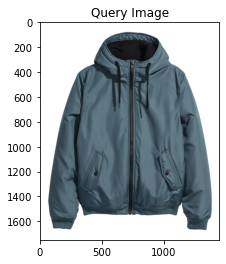

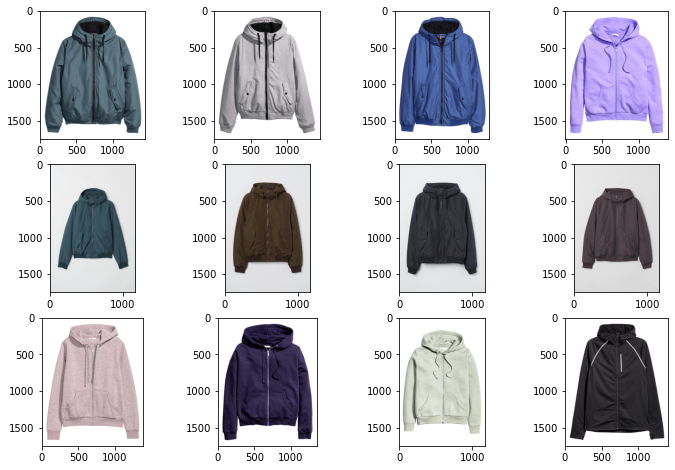

In [22]:
def input_show(data):
    plt.title("Query Image")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

def main(imageval):  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:999]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[imageval]))
    input_show(cv2.imread(output[imageval]))
    show_result(output,result)
  

if __name__=='__main__':
    main(99)

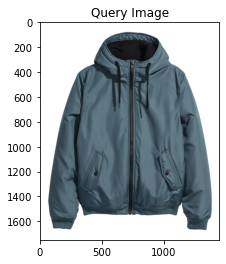

In [19]:
output=load_data()
input_show(cv2.imread(output[100]))